In [ ]:
import pandas as pd
import numpy as np
import requests
import urllib
import datetime
pd.set_option('display.max_columns', 50)
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)


# replace plc to 1-14

In [ ]:
rbrw = pd.read_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat.pkl')
rbrw.sort_values(['df_date'], inplace=True)
rbrw.reset_index(drop=True, inplace=True)

In [ ]:
rbrw['candidate_count'] = 0
rbrw

In [ ]:
gp = rbrw.groupby(['race_date', 'race_index', 'race_no'])
for key in gp.groups.keys():
    for i in gp.get_group(key).index.tolist():
        rbrw.iloc[i, rbrw.columns.get_loc('candidate_count')] = gp.get_group(key).index.shape[0]
rbrw_ = rbrw.copy()

In [ ]:
rbrw = rbrw_.copy()

In [ ]:
#rbrw['plc'] = rbrw['plc'].str.split(' ', expand=True)[0]
#rbrw['plc'] = rbrw['plc'].astype(str)
#move to datapreprocessing first

rbrw['special_incident'] = 0
rbrw['last_special_incident'] = 0

In [ ]:
#list = rbrw[rbrw['plc'].str.isnumeric()].index
#list

In [ ]:
#rbrw.loc[~rbrw['plc'].str.isnumeric(), 'special_incident'] = '1'
#rbrw[ rbrw['special_incident'] == '1' ]

In [ ]:
rbrw[rbrw['special_incident'] == 0]

In [ ]:
#rbrw.loc[~rbrw['plc'].str.isnumeric(), 'plc'] = np.NaN

In [ ]:
gp = rbrw.groupby(['horse_id'])
for key in gp.groups.keys():
    gpi = gp.get_group(key).index
    for i in range(gpi.shape[0] -1, 0 , -1):
        rbrw.iloc[gpi[i], rbrw.columns.get_loc('last_special_incident')] = rbrw.iloc[gpi[i-1]]['special_incident']
        rbrw.iloc[gpi[i], rbrw.columns.get_loc('last_plc')] = rbrw.iloc[gpi[i-1]]['plc']

In [ ]:
rbrw['last_plc'] = rbrw['last_plc'].astype(str)

In [ ]:
rbrw.loc[~rbrw['last_plc'].str.isnumeric(), 'last_plc'] = np.NaN

In [ ]:
rbrw['last_plc'].unique()

In [ ]:
rbrw.loc[rbrw['last_plc'].isnull(), 'last_plc'] = np.NaN

In [ ]:
rbrw['last_plc'] = rbrw['last_plc'].fillna(-1)
rbrw['last_plc'] = rbrw['last_plc'].astype(int)
rbrw['last_plc'] = rbrw['last_plc'].astype(str)
rbrw['last_plc'] = rbrw['last_plc'].replace('-1', np.nan)

In [ ]:
rbrw[rbrw['horse_id'] == 'HK_2009_L418'][['plc', 'last_plc', 'total_race_count', 'total_first_count', 'total_second_count', 'total_third_count', 'special_incident']]

In [ ]:
rbrw

In [ ]:
rbrw.drop_duplicates()

In [ ]:
rbrw['track']= rbrw['track'].str.strip()
rbrw['rc'] = rbrw['rc'].str.strip()
rbrw['course']= rbrw['course'].str.strip()
rbrw.to_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat_final.pkl')

# CHECK COLUMNS

In [ ]:
rbrw = pd.read_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat_final.pkl')

# check config

In [ ]:
config_set = ['df_date', 'race_date', 'season', 'race_index', 'horse_id', 'race_no', 'course', 'dist', 'candidate_count', 'rc', 'track']
fill_with_nan = ['course']

rbrw[config_set[10]].unique()

# check numeric

In [ ]:
numeric_features = ['actual_wt', 'declared_horse_wt', 'win_odds', 'age_2020', 'total_stakes', 'last_rating', 'total_first_count', 'total_second_count', 'total_third_count', 'total_race_count', 'mean_degree', 'mean_humidity', 'mean_pressure', 'diff_actual_wt' ,'diff_declared_horse_wt']

fill_with_nan = ['course','declared_horse_wt', 'win_odds', 'age_2020', 'last_rating']
fill_with_none = ['']

rbrw[numeric_features[14]].unique()

In [ ]:
rbrw.loc[rbrw['win_odds'] == '---', 'win_odds'] = np.NaN

In [ ]:
rbrw.loc[rbrw['declared_horse_wt'] == '---', 'declared_horse_wt'] = np.NaN

# check cate

In [ ]:
rbrw = pd.read_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat_final.pkl')

In [ ]:
categorical_features = ['race_length','course','draw', 'class', 'trainer_name', 'jockey_name', 'country', 'colour', 'sex', 'import_type', 'sire_name' ,'last_plc', 'month']

fill_with_nan = ['course','declared_horse_wt', 'win_odds', 'age_2020', 'last_rating']
fill_with_none = ['draw', 'last_plc', 'trainer_name', 'jockey_name']

rbrw[categorical_features[0]].unique()

In [ ]:
rbrw['race_length'] = rbrw['race_length'].str.strip()
rbrw['month'].unique()

In [ ]:
rbrw.loc[rbrw['trainer_name'] == '---', 'trainer_name'] = 'None'
rbrw.loc[rbrw['jockey_name'] == '---', 'jockey_name'] = 'None'

In [ ]:
rbrw.loc[rbrw['last_plc'] == '---', 'last_plc'] = 'None'
rbrw.loc[rbrw['draw'] == '---', 'draw'] = 'None'

rbrw.loc[rbrw['last_plc'].isnull(), 'last_plc'] = 'None'


In [ ]:
rbrw.to_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat_final.pkl')

# split into differnt race mode : 14horses , 12horses 

# TRANSFORM AND FIT

In [68]:
import pandas as pd
import numpy as np
import requests
import urllib
import datetime

import seaborn as sn
import matplotlib.pyplot as plt
from dython import nominal as nm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer

In [69]:
rbrw = pd.read_pickle('../data/model_input_data/pickle_data/(merged)result_basic_rec_weat_final.pkl')
rbrw['class'].unique()

array(['Class 4', 'Class 1', 'Hong Kong Group Three', 'Class 3',
       'Class 5', 'Class 2', 'Class 4 (Special Condition)',
       'Hong Kong Group One', 'Class 3 (Special Condition)',
       'Hong Kong Group Two', 'Group One', 'Griffin Race',
       'Class 4 (Restricted)', 'Group Two', 'Restricted Race',
       'Group Three', '4 Year Olds'], dtype=object)

In [70]:
rbrw = rbrw[rbrw['df_date'] >= '2016-01-01']
rbrw = rbrw[rbrw['df_date'] <= '2019-12-31']

rbrw.reset_index(drop=True, inplace=True)

In [73]:
rbrw['season']

0        15/16
1        15/16
2        15/16
3        15/16
4        15/16
         ...  
38194    19/20
38195    19/20
38196    19/20
38197    19/20
38198    19/20
Name: season, Length: 38199, dtype: object

In [48]:
###########imputer#######################

#parameter to change
rbrw['win_odds_'] = rbrw['win_odds']
rbrw['total_race_count_'] = rbrw['total_race_count']


tbd = ['age_2020', 'special_incident', 'last_special_incident', 'dist', 'total_stakes']
config_set = ['df_date', 'race_date', 'season', 'race_index', 'horse_id', 'race_no', 'class', 'win_odds_', 'total_race_count_']
label = ['finish_time_sec', 'rating', 'plc']

# some label are missing due to special event

In [49]:
numeric_features = ['actual_wt', 'declared_horse_wt', 'win_odds', 'last_rating', 'total_first_count', 'total_second_count', 'total_third_count', 'total_race_count', 'mean_degree', 'mean_humidity', 'mean_pressure', 'diff_actual_wt', 'diff_declared_horse_wt', 'candidate_count']

categorical_features = ['race_length','course','draw', 'class', 'trainer_name', 'jockey_name', 'country', 'colour', 'sex', 'import_type', 'sire_name' ,'last_plc', 'horse_id']

#28.6 score

# feature analysis

In [50]:
# corr matrix between continous data

<AxesSubplot:>

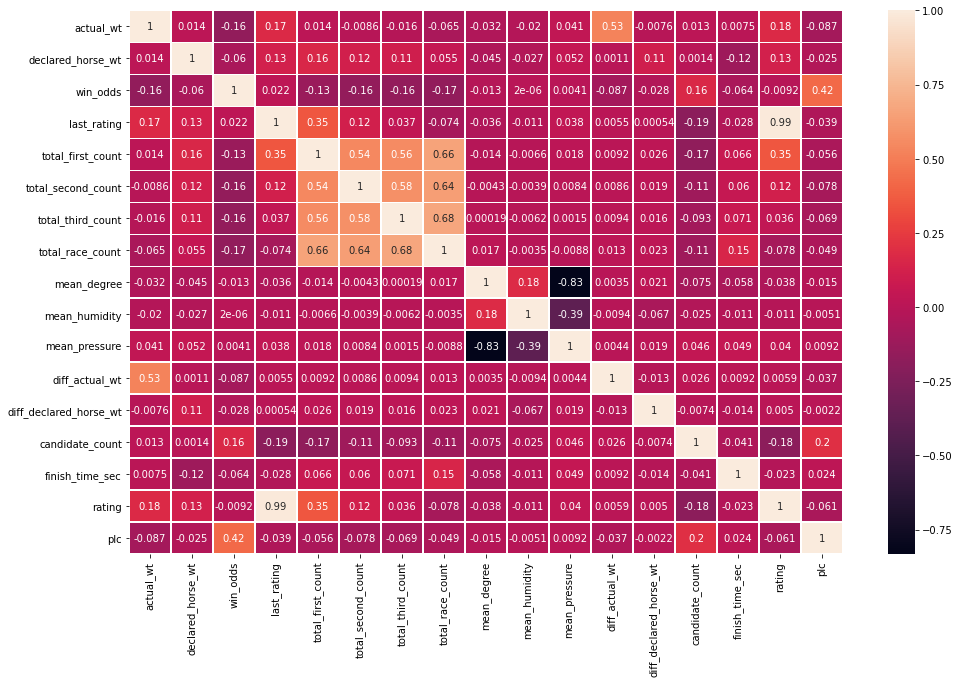

In [51]:
x = rbrw[numeric_features+ label].corr()
plt.figure(figsize = (16,10))
sn.heatmap(x, annot=True, linewidths=.5)


In [52]:
x = []
x_matrix = []
for i in categorical_features:
    for j in categorical_features:
        x.insert(len(x), nm.theils_u(rbrw[i], rbrw[j]))
    x_matrix.append(x)
    x=[]


# Uncertainty coefficient between categorical data (Theils'U)

In [53]:
rbrw['country'].unique().shape[0]

14

In [54]:
rbrw['sire_name'].unique().shape[0]

578

<AxesSubplot:>

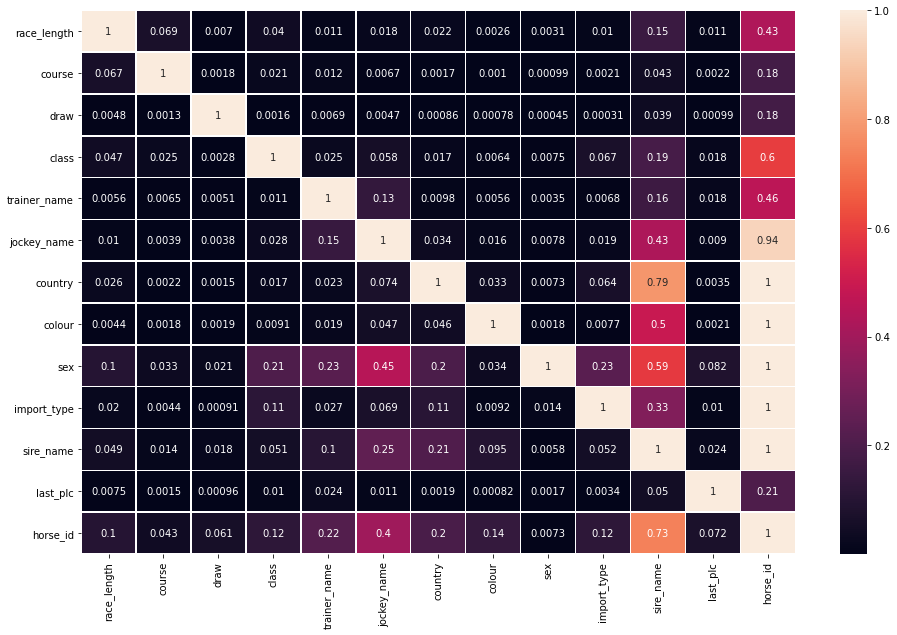

In [55]:
x_matrix = pd.DataFrame(x_matrix, columns = categorical_features, index = categorical_features)
plt.figure(figsize = (16,10))
sn.heatmap(x_matrix, annot=True, linewidths=.5)

#In this case, if we know the sire, we can probably know which country the horse is from
# U(Sire, Country) =0.19, -> given Country, we know 0.19 information about Sire
# U(Country, Sire) =0.75, -> given Sire, we know 0.75 information about Country
#given x-axis, how many information about y-axis is provided 

In [56]:
x = []
x_matrix = []
for i in categorical_features :
    for j in numeric_features:
        x.insert(len(x), nm.correlation_ratio(rbrw[i], rbrw[j]))
    x_matrix.append(x)
    x=[]


# Correlation Ratio between continous and categorical data

<AxesSubplot:>

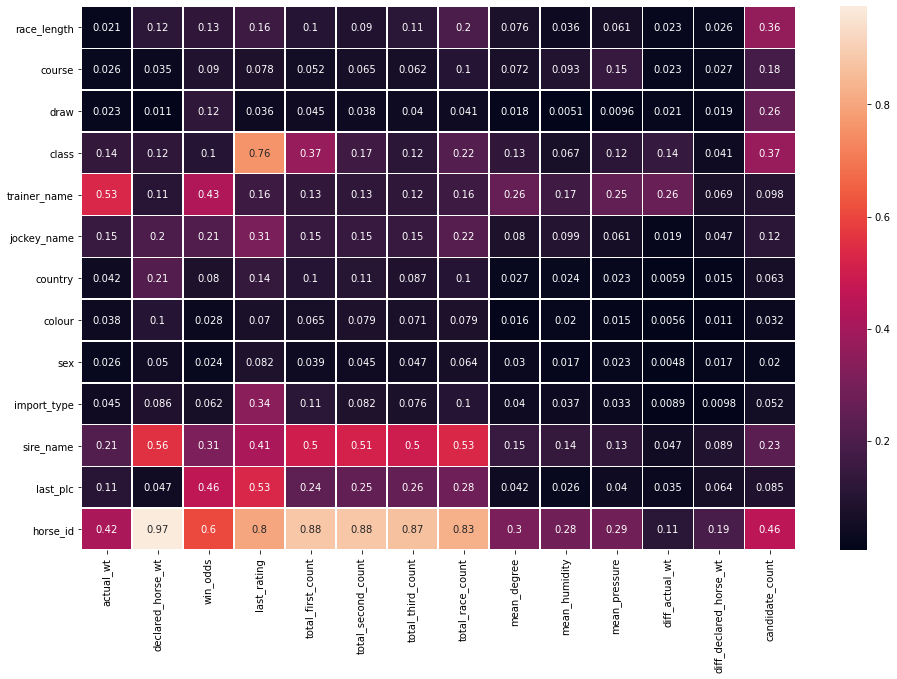

In [57]:
x_matrix = pd.DataFrame(x_matrix, columns = numeric_features, index = categorical_features)
plt.figure(figsize = (16,10))
sn.heatmap(x_matrix, annot=True, linewidths=.5)

#Given a continuous number, how well can you know to which category it belongs to?

In [58]:
gp = rbrw.groupby(['race_date', 'race_index'])
count = 0 
for key in gp.groups.keys():
    if key[0] == '2019/01/01':
        break
    count += 1

count

2323

In [59]:
# we use 7 training set : 3 testing set proportion
# 6720 days in total
# we use 4720 days to train model
train_list = []
test_list = []
count = 0

gp = rbrw.groupby(['race_date', 'race_index'])
for key in gp.groups.keys():
    if count < 2323:
        train_list += list(gp.get_group(key).index)
    else:
        test_list += list(gp.get_group(key).index)
    count+=1
#test_train_split


In [60]:
train_df = rbrw.iloc[train_list]
train_df.reset_index(drop=True, inplace=True)
train_df

,race_date,race_index,horse_id,race_no,race_length,plc,actual_wt,declared_horse_wt,draw,win_odds,...,df_date,month,mean_degree,mean_humidity,mean_pressure,candidate_count,special_incident,last_special_incident,win_odds_,total_race_count_
0,2016/01/01,291,HK_2012_P130,1,1400M,14,125,1126.0,1,10.0,...,2016-01-01,1,18.3,72,1025.9,14,0,0,10.0,35
1,2016/01/01,291,HK_2011_N272,1,1400M,13,124,1139.0,13,56.0,...,2016-01-01,1,18.3,72,1025.9,14,0,0,56.0,46
2,2016/01/01,291,HK_2012_P139,1,1400M,12,132,1118.0,9,138.0,...,2016-01-01,1,18.3,72,1025.9,14,0,0,138.0,33
3,2016/01/01,291,HK_2013_S214,1,1400M,11,115,1100.0,11,27.0,...,2016-01-01,1,18.3,72,1025.9,14,0,0,27.0,17
4,2016/01/01,291,HK_2011_N156,1,1400M,9,125,1067.0,12,193.0,...,2016-01-01,1,18.3,72,1025.9,14,0,0,193.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,2018/12/29,300,HK_2016_A030,10,1400M,4,120,1118.0,10,27.0,...,2018-12-29,12,14.0,68,1026.1,14,0,0,27.0,22
28336,2018/12/29,300,HK_2018_C143,10,1400M,11,120,1041.0,9,368.0,...,2018-12-29,12,14.0,68,1026.1,14,0,0,368.0,2
28337,2018/12/29,300,HK_2018_C054,10,1400M,3,118,1090.0,11,24.0,...,2018-12-29,12,14.0,68,1026.1,14,0,0,24.0,1
28338,2018/12/29,300,HK_2017_B257,10,1400M,2,126,1139.0,8,1.6,...,2018-12-29,12,14.0,68,1026.1,14,0,0,1.6,7


In [61]:
test_df = rbrw.iloc[test_list]
test_df.reset_index(drop=True, inplace=True)
test_df

,race_date,race_index,horse_id,race_no,race_length,plc,actual_wt,declared_horse_wt,draw,win_odds,...,df_date,month,mean_degree,mean_humidity,mean_pressure,candidate_count,special_incident,last_special_incident,win_odds_,total_race_count_
0,2019/01/01,301,HK_2016_A344,1,1600M,1,131,1212.0,5,2.8,...,2019-01-01,1,13.8,68,1026.5,9,0,0,2.8,10
1,2019/01/01,301,HK_2015_V400,1,1600M,2,121,1151.0,8,7.0,...,2019-01-01,1,13.8,68,1026.5,9,0,0,7.0,18
2,2019/01/01,301,HK_2017_B006,1,1600M,3,116,1096.0,4,11.0,...,2019-01-01,1,13.8,68,1026.5,9,0,0,11.0,14
3,2019/01/01,301,HK_2016_A120,1,1600M,4,130,1039.0,6,17.0,...,2019-01-01,1,13.8,68,1026.5,9,0,0,17.0,20
4,2019/01/01,301,HK_2016_A087,1,1600M,5,118,1112.0,1,3.5,...,2019-01-01,1,13.8,68,1026.5,9,0,0,3.5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,2019/12/29,293,HK_2017_B161,10,1650M,4,127,1131.0,3,10.0,...,2019-12-29,12,18.8,88,1018.3,14,0,0,10.0,17
9855,2019/12/29,293,HK_2016_A193,10,1650M,10,118,1060.0,12,13.0,...,2019-12-29,12,18.8,88,1018.3,14,0,0,13.0,45
9856,2019/12/29,293,HK_2018_C197,10,1650M,3,119,1146.0,6,3.9,...,2019-12-29,12,18.8,88,1018.3,14,0,0,3.9,12
9857,2019/12/29,293,HK_2017_B203,10,1650M,1,125,1048.0,8,25.0,...,2019-12-29,12,18.8,88,1018.3,14,0,0,25.0,25


In [62]:
tr_df = train_df.copy()
te_df = test_df.copy()

tr_df.reset_index(drop=True, inplace=True)
te_df.reset_index(drop=True, inplace=True)
#parameter to change

tr_df['race_length'].unique()

array(['1400M', '1800M', '1000M', '1600M', '1200M', '1650M', '2200M',
       '2000M', '2400M'], dtype=object)

In [63]:

numeric_imputer = KNNImputer()
categorical_imputer = SimpleImputer(strategy='constant', fill_value='None')

###################### imputing ##############################
#fit_transform
tr_num_df = pd.DataFrame(numeric_imputer.fit_transform(tr_df[numeric_features]))
tr_cate_df = pd.DataFrame(categorical_imputer.fit_transform(tr_df[categorical_features]))

#get features name
tr_num_df.columns = numeric_features
tr_cate_df.columns = categorical_features

#transform
te_num_df = pd.DataFrame(numeric_imputer.transform(te_df[numeric_features]))
te_cate_df = pd.DataFrame(categorical_imputer.transform(te_df[categorical_features]))

#get features name
te_num_df.columns = numeric_features
te_cate_df.columns = categorical_features


In [64]:
################### onehot encoding ##########################
# m/f
#


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

num_columnTransformer = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
cate_columnTransformer = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])


###################  standadization /
tr_num_df = pd.DataFrame(num_columnTransformer.fit_transform(tr_num_df))
tr_cate_df = pd.DataFrame(cate_columnTransformer.fit_transform(tr_cate_df).toarray())

tr_num_df.columns = numeric_features
tr_cate_df.columns = cate_columnTransformer.get_feature_names()

tr_plk = pd.concat([tr_df[config_set + label], tr_num_df, tr_cate_df], axis=1)

##############
te_num_df = pd.DataFrame(num_columnTransformer.transform(te_num_df))
te_cate_df = pd.DataFrame(cate_columnTransformer.transform(te_cate_df).toarray())

te_num_df.columns = numeric_features
te_cate_df.columns = cate_columnTransformer.get_feature_names()

te_plk = pd.concat([te_df[config_set + label], te_num_df, te_cate_df], axis=1)

In [65]:
tr_cate_df

,cat__x0_1000M,cat__x0_1200M,cat__x0_1400M,cat__x0_1600M,cat__x0_1650M,cat__x0_1800M,cat__x0_2000M,cat__x0_2200M,cat__x0_2400M,cat__x1_A,...,cat__x12_HK_2018_C811,cat__x12_HK_2018_C812,cat__x12_HK_2018_C814,cat__x12_HK_2018_C815,cat__x12_HK_2018_C816,cat__x12_HK_2018_C817,cat__x12_HK_2018_C818,cat__x12_HK_2018_C819,cat__x12_HK_2018_C820,cat__x12_HK_2018_C821
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
tr_plk.to_pickle('../data/ready_to_input/training_set.pkl')

In [67]:
te_plk.to_pickle('../data/ready_to_input/testing_set.pkl')